# Experiment 1: Baselines

WANDB tag: `exp1`

In [1]:
import matplotlib.pyplot as plt
import wandb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_context('paper')

In [2]:
api = wandb.Api(api_key="cc080145b244f97b7db093ba0e3de5088e7ee7aa")

In [3]:
runs = api.runs(path="acs-thesis-lb2027/gnn-baselines", include_sweeps=False, filters={"$and": [{"tags": {"$in": ["exp1"]}}, {"state": "finished"}]})

In [4]:
rows = []

for run in runs:
	row = {
		"model": run.config["model"],
		"dataset": run.config["dataset"],
		"test_accuracy": run.summary["test/accuracy"]
	}
	
	rows.append(row)

In [5]:
df = pd.DataFrame(rows)

In [6]:
df

,model,dataset,test_accuracy
0,GAT,IMDB,0.7648
1,GAT,IMDB,0.7964
2,GAT,IMDB,0.8358
3,GAT,IMDB,0.8714
4,GAT,IMDB,0.8690
...,...,...,...
235,DiagSheaf,DBLP,0.9540
236,DiagSheaf,DBLP,0.9640
237,DiagSheaf,DBLP,0.9580
238,DiagSheaf,DBLP,0.9700


<Axes: xlabel='model', ylabel='test_accuracy'>

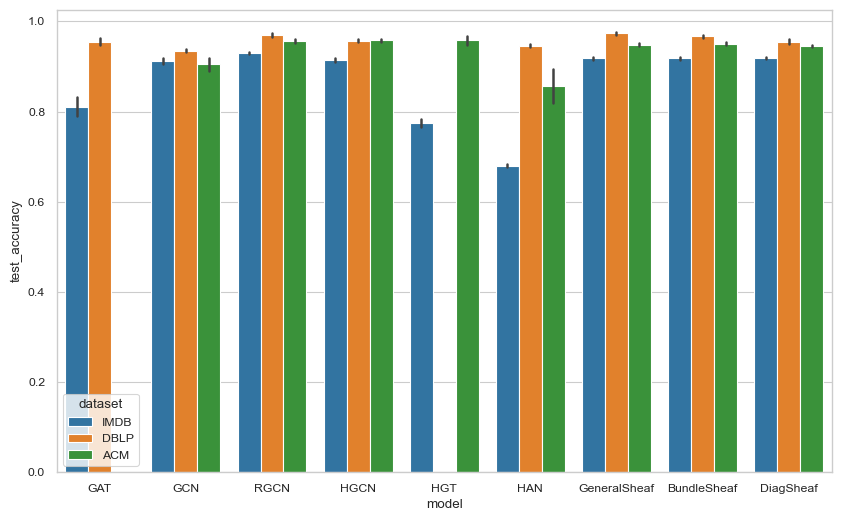

In [7]:
fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(111)

sns.barplot(df, x="model", y="test_accuracy", hue="dataset", ax=ax)

In [10]:
grouped = df.groupby(["model", "dataset"]).agg(["mean", "std"])["test_accuracy"]["mean"].unstack()
grouped.style.highlight_max(color='blue')

dataset,ACM,DBLP,IMDB
model,,,
BundleSheaf,0.950600,0.967200,0.918100
DiagSheaf,0.945400,0.955300,0.919120
GAT,nan,0.955111,0.810340
GCN,0.904600,0.934500,0.912660
GeneralSheaf,0.948500,0.973556,0.917900
HAN,0.856500,0.945800,0.680120
HGCN,0.957800,0.957000,0.914080
HGT,0.958000,nan,0.775180
RGCN,0.956800,0.969600,0.930500
